# **Capstone Project GRP4 NLP B**

Hi!

test

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd 
import numpy as np 
import re 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/drive/My Drive')

In [6]:
Ticket_df = pd.read_excel(r'/content/drive/MyDrive/Capstone Project - Ticket Routing NLP/input_data.xlsx')

In [7]:
Ticket_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [8]:
Ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [9]:
Ticket_df.shape

(8500, 4)

In [10]:
unique_callers = Ticket_df['Caller'].unique()
unique_callers.shape

(2950,)

In [11]:
Func_group = Ticket_df['Assignment group'].unique()
Func_group.shape

(74,)

In [12]:
TargetGroupCnt=Ticket_df['Assignment group'].value_counts()
TargetGroupCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

In [13]:
Ticket_df.Caller.value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
pmgzhivt shexujmb      1
eqmuniov ehxkcbgj      1
vncqjgzi tvalnycz      1
jdeoycaq geqctmlh      1
lwyghvsc erftxsny      1
Name: Caller, Length: 2950, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


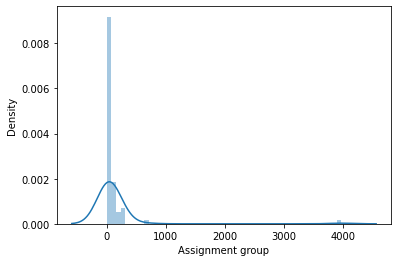

In [14]:
sns.distplot(Ticket_df['Assignment group'].value_counts())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


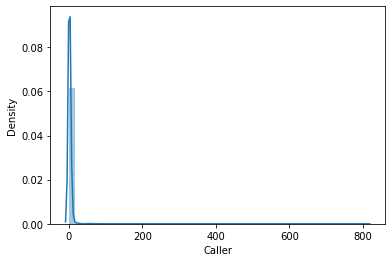

In [15]:
sns.distplot(Ticket_df['Caller'].value_counts())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


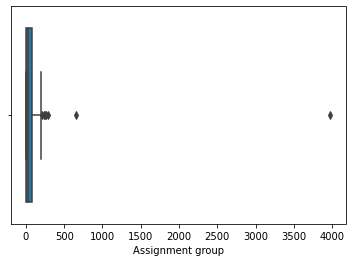

In [16]:
sns.boxplot(Ticket_df['Assignment group'].value_counts())

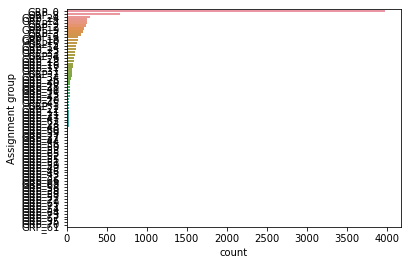

In [17]:
sns.countplot(y="Assignment group", data=Ticket_df, order=Ticket_df['Assignment group'].value_counts().index )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


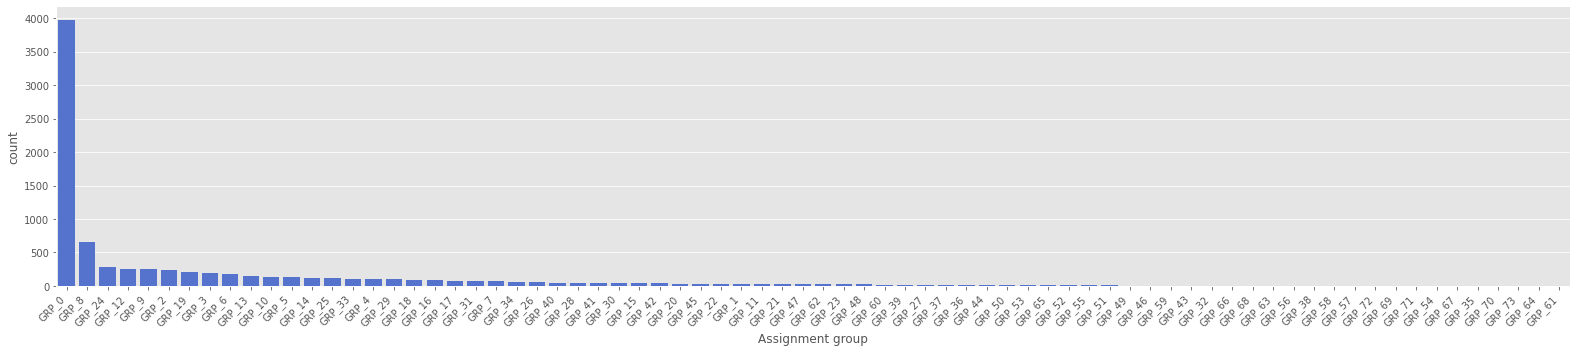

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = Ticket_df['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=Ticket_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [19]:
Ticket_df.isnull().values.any()

True

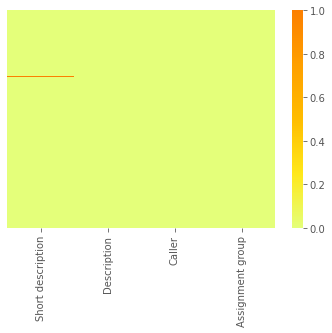

In [20]:
sns.heatmap(Ticket_df.isnull(), yticklabels=False, cmap="Wistia")

In [21]:
Ticket_df['Description'].fillna(value=' ', inplace=True)

In [22]:
Ticket_df['Short description'].fillna(value=' ', inplace=True)

In [23]:
Ticket_df.isnull().values.any()

False

In [24]:
! pip install ftfy

     |████████████████████████████████| 71kB 5.5MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=abcae7a754409c2a957173d6a5dc1d0c1dda954a6197f9c84f8d1e6ff44ef558
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy


In [25]:
! pip install googletrans

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 983kB 14.9MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=6e4664bd09af9adad39283d99fa5662a1ee773f7d3f72c457212b1bc53b15a1f
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=5ab84865ad486d93886f6ad7c77ea1e73a430554dc335af5f10f5dd56f7c63b9
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [26]:
! pip install langdetect

     |████████████████████████████████| 983kB 8.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=6a51dda5ea869e77830b9c85cc01e20567cae2e9db2e028fab877b731d5d1817
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [27]:
from ftfy import fix_text

In [29]:
print(fix_text('uÌˆnicode'))

ünicode


In [30]:
ftfy_ShortDescription = []
for Short_Description in Ticket_df['Short description']:
  ftfy_ShortDescription.append(fix_text(Short_Description))
Ticket_df['clean_ShortDesc']= ftfy_ShortDescription

In [36]:
ftfy_Description = []
for Description in Ticket_df['Description']:
  ftfy_Description.append(fix_text(Description))
Ticket_df['clean_Desc']= ftfy_Description

In [37]:
Ticket_df.head()

,Short description,Description,Caller,Assignment group,clean_ShortDesc,clean_Desc
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,-verified user details.(employee# & manager na...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [25]:
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [33]:
Langdetect_ShortDescription = []
for Short_Description in Ticket_df['Short description']:
  Langdetect_ShortDescription.append(detect("Ticket_df['Short description']"))
Ticket_df['Lang_ShortDesc']= Langdetect_ShortDescription

In [38]:
#Ticket_df['Short description'][0]

'login issue'

In [25]:
#Ticket_df['Lang_ShortDesc'] = detect("[Ticket_df.'Short description']")

In [41]:
#Ticket_df['Lang_ShortDesc'] =detect("Ticket_df['Short description']")

In [27]:
Ticket_df.head()

,Short description,Description,Caller,Assignment group,Lang_ShortDesc
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,en


In [28]:
lang_nonen_text=Ticket_df.loc[Ticket_df['Lang_ShortDesc']!="en"]
lang_nonen_text.head()

,Short description,Description,Caller,Assignment group,Lang_ShortDesc


In [28]:
Ticket_df['Lang_Desc'] = detect("[Ticket_df.'Description']")

In [29]:
lang_nonen_text=Ticket_df.loc[Ticket_df['Lang_Desc']!="en"]
lang_nonen_text.head()

,Short description,Description,Caller,Assignment group,Lang_ShortDesc,Lang_Desc


In [30]:
detect("aenderungsantrag kann nicht geloescht werden")

'de'

In [31]:
detect_langs("aenderungsantrag kann nicht geloescht werden")

[de:0.9999971615418436]

In [32]:
non_eng_text=Ticket_df.loc[Ticket_df['Caller']=="gusyjcer lvbxfimr"]
non_eng_text

,Short description,Description,Caller,Assignment group,clean_ShortDesc
7555,aenderungsantrag kann nicht geloescht werden.,aenderungsantrag kann nicht geloescht werden.,gusyjcer lvbxfimr,GRP_0,aenderungsantrag kann nicht geloescht werden.
7558,net weaver business client does not work.,net weaver business client does not work. \r\n...,gusyjcer lvbxfimr,GRP_0,net weaver business client does not work.


In [49]:
def classify(text, debug = False):
	# identifier.set_languages(DETECT_LANGUAGES)
	try:
		lang1 = detect_langs(text)[0]
	except UnicodeDecodeError:
		lang1 = detect_langs(text.decode("utf-8"))[0]
	prob = lang1.prob
	lang = lang1.lang

	if debug:
		return (lang, prob)

	if prob > 0.90:
		return lang

	return None

In [50]:
classify_Description = []
for calssify_lang_Description in Ticket_df['Description']:
  classify_Description.append(classify(calssify_lang_Description, debug = False))

LangDetectException: ignored

In [ ]:
Ticket_df['Lang_classify_Description'] = classify_Description

In [ ]:
#As different lines are of different length. We need to pad the our sequences using the max length
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
    Ticket_df['Description'] = Ticket_df['Description'].apply(clean_data)
    Ticket_df['Short description'] = Ticket_df['Short description'].apply(clean_data)

In [ ]:
def clean_text(text, remove_stopwords=True):
  # Convert words to lower case
  text = text.lower()
  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
      text = " ".join(new_text)
      text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
      text = re.sub(r'\<a href', ' ', text)
      text = re.sub(r'&amp;', '', text)
      text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
      text = re.sub(r'<br />', ' ', text)
      text = re.sub(r'\'', ' ', text)
      if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
  return text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Ticket_df.head()

In [ ]:
#Ticket_df.head()

In [ ]:
#Ticket_df.drop('Short description', inplace= True, axis=1)

In [ ]:
#Ticket_df.drop('Description', inplace= True, axis=1)

In [ ]:
#Ticket_df.head()

In [ ]:
from googletrans import Translator

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

stpwd = stopwords.words('english')
for i,text in enumerate(Ticket_df['Description']):
  Ticket_df['Description'][i]=" ".join(word for word in text.split(' ') if word not in stpwd)

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

Ticket_df['Description'] = Ticket_df['Description'].apply(lemmatize_text)
Ticket_df['Short description'] = Ticket_df['Short description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Clean the Descriptions and texts
import re
from nltk.corpus import stopwords 
from pickle import dump, load

clean_Description = []
for Description in Ticket_df.Description:
  clean_Description.append(clean_text(Description, remove_stopwords=False))
print("Description are complete.")
clean_texts = []
for text in Ticket_df.Description:
  clean_texts.append(clean_text(text))
print("Texts are complete.")

Description are complete.
Texts are complete.


In [ ]:
Ticket_df['Clean_Description'] = clean_Description

In [ ]:
clean_ShortDescription = []
for Short_Description in Ticket_df['Short description']:
  clean_ShortDescription.append(clean_text(Short_Description, remove_stopwords=False))
print("Short Description are complete.")
clean_texts = []
for text in Ticket_df['Short description']:
  clean_texts.append(clean_text(text))
print("Texts are complete.")

Short Description are complete.
Texts are complete.


In [ ]:
Ticket_df['Clean_ShortDescription'] = clean_ShortDescription

In [33]:
Ticket_df.head(3)

,Short description,Description,Caller,Assignment group,clean_ShortDesc
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn


In [34]:
problem_text=Ticket_df.loc[Ticket_df['Caller']=="qayozbcd vwglmpjq"]
problem_text

,Short description,Description,Caller,Assignment group,clean_ShortDesc
618,outlookæ‰“ä¸å¼€,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,qayozbcd vwglmpjq,GRP_0,outlook打不开
